# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [30]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [31]:
websites = pd.read_csv('data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [32]:
# Your code here
websites.shape #(1781, 21)
websites.columns
websites
websites.sample(5)
websites.dtypes


URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [33]:
# Your comment here
# websites.select_dtypes(['int64','float64']).corr()

corr=np.abs(websites.select_dtypes(['int64','float64']).corr())
corr

URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  \
URL_LENGTH                   1.000000                   0.917986   
NUMBER_SPECIAL_CHARACTERS    0.917986                   1.000000   
CONTENT_LENGTH               0.129745                   0.214225   
TCP_CONVERSATION_EXCHANGE    0.038407                   0.037459   
DIST_REMOTE_TCP_PORT         0.039839                   0.042619   
REMOTE_IPS                   0.046367                   0.047103   
APP_BYTES                    0.026446                   0.023914   
SOURCE_APP_PACKETS           0.042264                   0.040096   
REMOTE_APP_PACKETS           0.033779                   0.030597   
SOURCE_APP_BYTES             0.014857                   0.014376   
REMOTE_APP_BYTES             0.026686                   0.024098   
APP_PACKETS                  0.042264                   0.040096   
DNS_QUERY_TIMES              0.068582                   0.050048   
Type                         0.162104                   0.280897   

                           CONTENT_LENGTH  TCP_CONVERSATION_EXCHANGE  \
URL_LENGTH                       0.129745                   0.038407   
NUMBER_SPECIAL_CHARACTERS        0.214225                   0.037459   
CONTENT_LENGTH                   1.000000                   0.078451   
TCP_CONVERSATION_EXCHANGE        0.078451                   1.000000   
DIST_REMOTE_TCP_PORT             0.000381                   0.555188   
REMOTE_IPS                       0.004774                   0.331080   
APP_BYTES                        0.051202                   0.457320   
SOURCE_APP_PACKETS               0.074142                   0.997796   
REMOTE_APP_PACKETS               0.091077                   0.990848   
SOURCE_APP_BYTES                 0.100094                   0.865580   
REMOTE_APP_BYTES                 0.047595                   0.458702   
APP_PACKETS                      0.074142                   0.997796   
DNS_QUERY_TIMES                  0.045644                   0.349832   
Type                             0.090852                   0.040202   

                           DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  \
URL_LENGTH                             0.039839    0.046367   0.026446   
NUMBER_SPECIAL_CHARACTERS              0.042619    0.047103   0.023914   
CONTENT_LENGTH                         0.000381    0.004774   0.051202   
TCP_CONVERSATION_EXCHANGE              0.555188    0.331080   0.457320   
DIST_REMOTE_TCP_PORT                   1.000000    0.210188   0.780238   
REMOTE_IPS                             0.210188    1.000000   0.023126   
APP_BYTES                              0.780238    0.023126   1.000000   
SOURCE_APP_PACKETS                     0.558612    0.361104   0.445822   
REMOTE_APP_PACKETS                     0.591188    0.304683   0.468999   
SOURCE_APP_BYTES                       0.313359    0.171651   0.074464   
REMOTE_APP_BYTES                       0.781212    0.025324   0.999992   
APP_PACKETS                            0.558612    0.361104   0.445822   
DNS_QUERY_TIMES                        0.259942    0.548189   0.012221   
Type                                   0.082925    0.078783   0.011262   

                           SOURCE_APP_PACKETS  REMOTE_APP_PACKETS  \
URL_LENGTH                           0.042264            0.033779   
NUMBER_SPECIAL_CHARACTERS            0.040096            0.030597   
CONTENT_LENGTH                       0.074142            0.091077   
TCP_CONVERSATION_EXCHANGE            0.997796            0.990848   
DIST_REMOTE_TCP_PORT                 0.558612            0.591188   
REMOTE_IPS                           0.361104            0.304683   
APP_BYTES                            0.445822            0.468999   
SOURCE_APP_PACKETS                   1.000000            0.989285   
REMOTE_APP_PACKETS                   0.989285            1.000000   
SOURCE_APP_BYTES                     0.857495            0.880555   
REMOTE_APP_BYTES                     0.447448          

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

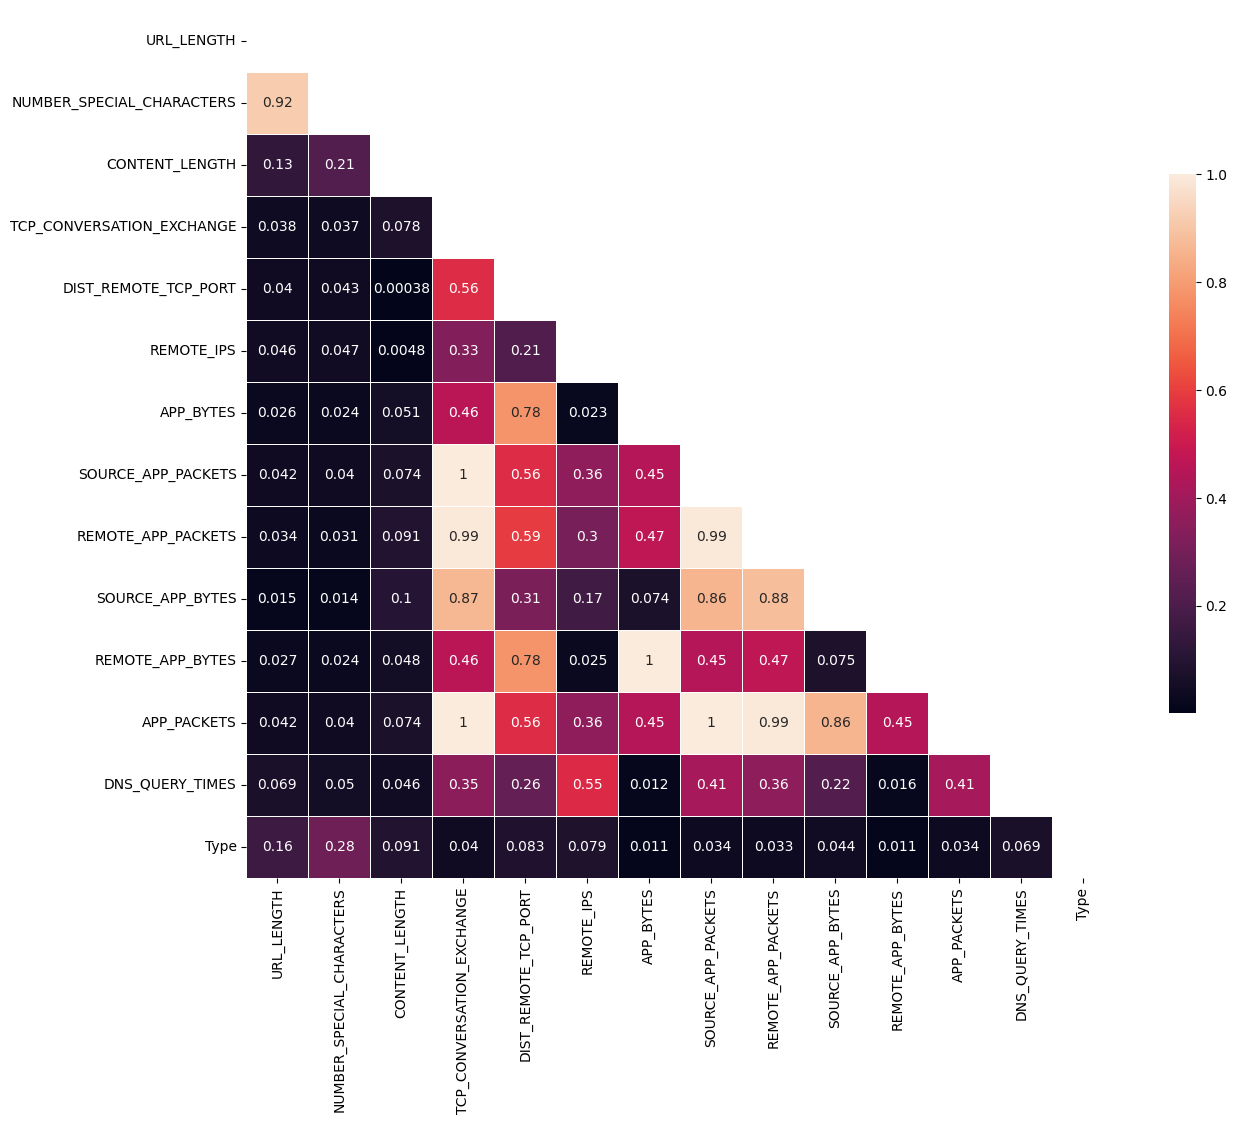

In [34]:
# Your code here

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

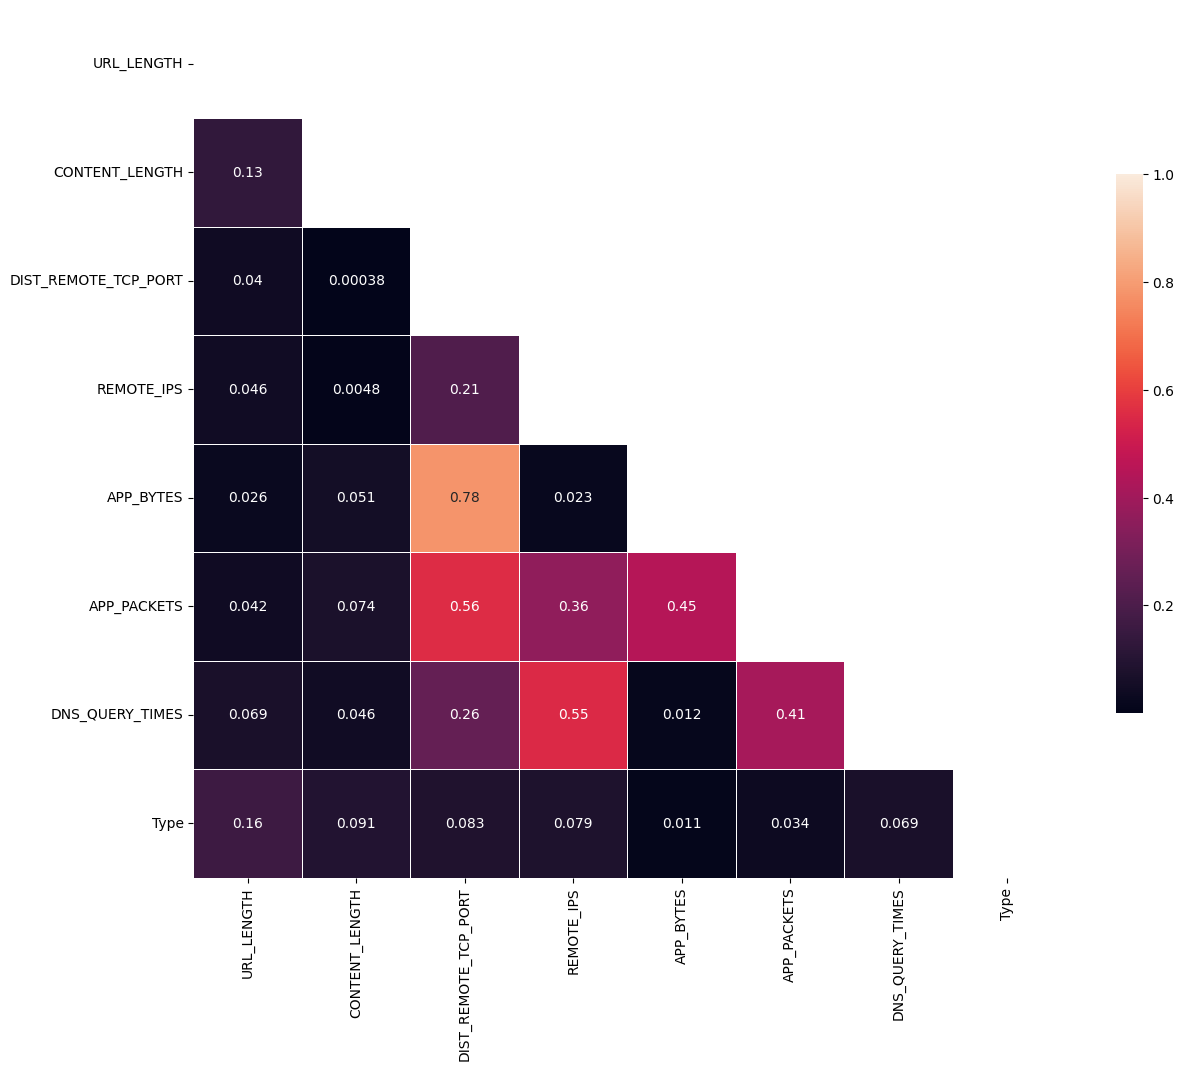

In [35]:
# Your comment here

websites.columns
# ['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
    #    'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
    #    'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
    #    'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
    #    'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
    #    'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type']
# col_remove =['SOURCE_APP_BYTES','REMOTE_APP_BYTES','SOURCE_APP_PACKETS','REMOTE_APP_PACKETS','SOURCE_APP_BYTES','NUMBER_SPECIAL_CHARACTERS','TCP_CONVERSATION_EXCHANGE','DIST_REMOTE_TCP_PORT']
col_remove =['SOURCE_APP_BYTES','REMOTE_APP_BYTES','SOURCE_APP_PACKETS','REMOTE_APP_PACKETS','NUMBER_SPECIAL_CHARACTERS','TCP_CONVERSATION_EXCHANGE']

corr_new=np.abs(websites.select_dtypes(['int64','float64']).drop(col_remove, axis=1).corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr_new, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr_new, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr_new)

plt.show()

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [36]:
# Your code here
# 'SOURCE_APP_BYTES','REMOTE_APP_BYTES','SOURCE_APP_PACKETS','REMOTE_APP_PACKETS','NUMBER_SPECIAL_CHARACTERS','TCP_CONVERSATION_EXCHANGE' columns are highly correlated with correlation higher than 90% and can be removed

websites.dtypes
websites_nc =  websites.drop(col_remove, axis=1)
websites_nc

URL  URL_LENGTH       CHARSET  \
0      M0_109          16    iso-8859-1   
1     B0_2314          16         UTF-8   
2      B0_911          16      us-ascii   
3      B0_113          17    ISO-8859-1   
4      B0_403          17         UTF-8   
5     B0_2064          18         UTF-8   
6      B0_462          18    iso-8859-1   
7     B0_1128          19      us-ascii   
8       M2_17          20         utf-8   
9       M3_75          20         utf-8   
10    B0_1013          20         utf-8   
11    B0_1102          20      us-ascii   
12      B0_22          20         utf-8   
13     B0_482          20    ISO-8859-1   
14     B0_869          20    ISO-8859-1   
15      M0_71          21    ISO-8859-1   
16      M0_97          21    iso-8859-1   
17    B0_2303          21      us-ascii   
18     B0_584          21         utf-8   
19      M0_69          22      us-ascii   
20     B0_161          22         utf-8   
21    B0_2122          22    iso-8859-1   
22    B0_2176          22    iso-8859-1   
23     B0_569          22         utf-8   
24     B0_601          22         UTF-8   
25     B0_884          22    ISO-8859-1   
26     B0_905          22    ISO-8859-1   
27     B0_916          22         utf-8   
28     B0_102          23         utf-8   
29    B0_1130          23    iso-8859-1   
30    B0_1185          23      us-ascii   
31    B0_1369          23         utf-8   
32    B0_1412          23    ISO-8859-1   
33    B0_2217          23    ISO-8859-1   
34    B0_2240          23         UTF-8   
35      B0_23          23           NaN   
36     B0_241          23         UTF-8   
37     B0_285          23         UTF-8   
38     B0_465          23         UTF-8   
39     B0_599          23    ISO-8859-1   
40     B0_614          23    iso-8859-1   
41     B0_622          23    ISO-8859-1   
42     B0_790          23      us-ascii   
43     M0_175          24    ISO-8859-1   
44      M0_89          24    iso-8859-1   
45     B0_108          24         utf-8   
46     B0_126          24    ISO-8859-1   
47     B0_171          24         utf-8   
48    B0_2301          24         utf-8   
49    B0_2313          24         utf-8   
50    B0_2315          24      us-ascii   
51     B0_282          24    iso-8859-1   
52     B0_321          24         utf-8   
53     B0_326          24    iso-8859-1   
54     B0_483          24         utf-8   
55     B0_543          24    iso-8859-1   
56     B0_656          24         UTF-8   
57    B0_1163          25         utf-8   
58    B0_1308          25         utf-8   
59    B0_1347          25         UTF-8   
60    B0_2127          25      us-ascii   
61    B0_2224          25         UTF-8   
62     B0_468          25         UTF-8   
63     B0_568          25         UTF-8   
64     B0_577          25         UTF-8   
65     B0_704          25    ISO-8859-1   
66     B0_781          25         UTF-8   
67     B0_786          25      us-ascii   
68     B0_886          25    ISO-8859-1   
69     M0_111          26         UTF-8   
70      M0_15          26         utf-8   
71     M0_171          26    ISO-8859-1   
72      M0_68          26    ISO-8859-1   
73      M0_70          26    ISO-8859-1   
74      M0_72          26    ISO-8859-1   
75    B0_1125          26         utf-8   
76    B0_1205          26         UTF-8   
77    B0_1321          26         UTF-8   
78    B0_1374          26    iso-8859-1   
79     B0_159          26         UTF-8   
80     B0_173          26         utf-8   
81     B0_179          26           NaN   
82    B0_2027          26    ISO-8859-1   
83    B0_2152          26         utf-8   
84    B0_2293          26         UTF-8   
85     B0_256          26    iso-8859-1   
86     B0_258          26         utf-8   
87     B0_297          26         utf-8   
88     B0_660          26         utf-8   
89     B0_793          26    ISO-8859-1   
90     B0_859          26      us-ascii   
91     B0_883          26         UTF-8   
92     B0_9

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [37]:
# Your code here
print(websites_nc.isna().sum(), websites.shape)

URL                       0
URL_LENGTH                0
CHARSET                   7
SERVER                  176
CONTENT_LENGTH          812
WHOIS_COUNTRY           306
WHOIS_STATEPRO          362
WHOIS_REGDATE           127
WHOIS_UPDATED_DATE      139
DIST_REMOTE_TCP_PORT      0
REMOTE_IPS                0
APP_BYTES                 0
APP_PACKETS               0
DNS_QUERY_TIMES           1
Type                      0
dtype: int64 (1781, 21)


If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [38]:
# Your code here
# CONTENT_LENGTH is null in more than 10% of data and will be dropped
websites_nc =  websites.drop(['CONTENT_LENGTH'], axis=1)
websites_nc

URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS       CHARSET  \
0      M0_109          16                          7    iso-8859-1   
1     B0_2314          16                          6         UTF-8   
2      B0_911          16                          6      us-ascii   
3      B0_113          17                          6    ISO-8859-1   
4      B0_403          17                          6         UTF-8   
5     B0_2064          18                          7         UTF-8   
6      B0_462          18                          6    iso-8859-1   
7     B0_1128          19                          6      us-ascii   
8       M2_17          20                          5         utf-8   
9       M3_75          20                          5         utf-8   
10    B0_1013          20                          6         utf-8   
11    B0_1102          20                          6      us-ascii   
12      B0_22          20                          7         utf-8   
13     B0_482          20                          6    ISO-8859-1   
14     B0_869          20                          7    ISO-8859-1   
15      M0_71          21                          7    ISO-8859-1   
16      M0_97          21                          7    iso-8859-1   
17    B0_2303          21                          6      us-ascii   
18     B0_584          21                          6         utf-8   
19      M0_69          22                          7      us-ascii   
20     B0_161          22                          6         utf-8   
21    B0_2122          22                          6    iso-8859-1   
22    B0_2176          22                          6    iso-8859-1   
23     B0_569          22                          7         utf-8   
24     B0_601          22                          6         UTF-8   
25     B0_884          22                          6    ISO-8859-1   
26     B0_905          22                          6    ISO-8859-1   
27     B0_916          22                          6         utf-8   
28     B0_102          23                          6         utf-8   
29    B0_1130          23                          6    iso-8859-1   
30    B0_1185          23                          6      us-ascii   
31    B0_1369          23                          6         utf-8   
32    B0_1412          23                          7    ISO-8859-1   
33    B0_2217          23                          6    ISO-8859-1   
34    B0_2240          23                          7         UTF-8   
35      B0_23          23                          6           NaN   
36     B0_241          23                          6         UTF-8   
37     B0_285          23                          6         UTF-8   
38     B0_465          23                          6         UTF-8   
39     B0_599          23                          6    ISO-8859-1   
40     B0_614          23                          6    iso-8859-1   
41     B0_622          23                          6    ISO-8859-1   
42     B0_790          23                          6      us-ascii   
43     M0_175          24                          8    ISO-8859-1   
44      M0_89          24                          9    iso-8859-1   
45     B0_108          24                          6         utf-8   
46     B0_126          24                          6    ISO-8859-1   
47     B0_171          24                          7         utf-8   
48    B0_2301          24                          6         utf-8   
49    B0_2313          24                          6         utf-8   
50    B0_2315          24                          6      us-ascii   
51     B0_282          24                          8    iso-8859-1   
52     B0_321          24                          6         utf-8   
53     B0_326          24                          7    iso-8859-1   
54     B0_483          24                          7         utf-8   
55     B0_543          24                          6    iso-8859-1   
56     B0_656       

In [39]:
# Your comment here

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [40]:
# Examine missing values in each column
websites_nc.isna().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [41]:
# Your code here
websites_nc['WHOIS_COUNTRY'].unique()
websites_nc['WHOIS_COUNTRY'].replace({'Cyprus':'CY', 'us':'US', "[u'GB'; u'UK']":'GB', 'United Kingdom':'GB','se':'SE', 'ru':'RU'},inplace=True)
websites_nc['WHOIS_COUNTRY'].unique()

/var/folders/lw/14dpn8b91z99svtdtfqnx09800tlp4/T/ipykernel_22338/3218095729.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  websites_nc['WHOIS_COUNTRY'].replace({'Cyprus':'CY', 'us':'US', "[u'GB'; u'UK']":'GB', 'United Kingdom':'GB','se':'SE', 'ru':'RU'},inplace=True)


array([nan, 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN',
       'LU', 'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'KY', 'AT',
       'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK',
       'UA', 'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

WHOIS_COUNTRY
US    1106
CA      84
ES      63
AU      35
GB      25
PA      21
JP      11
UK      10
CN      10
IN      10
Name: count, dtype: int64
Index(['US', 'CA', 'ES', 'AU', 'GB', 'PA', 'JP', 'UK', 'CN', 'IN'], dtype='object', name='WHOIS_COUNTRY')


<Axes: xlabel='WHOIS_COUNTRY'>

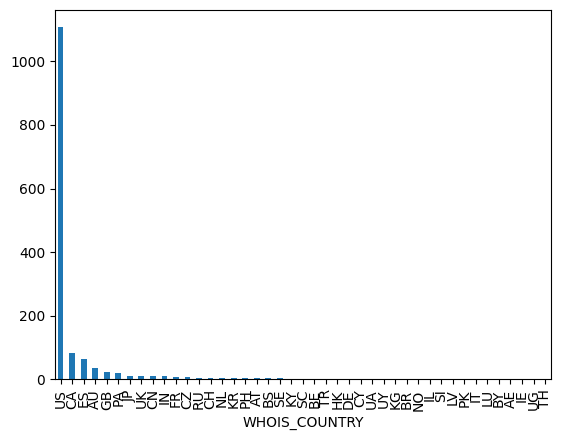

In [42]:
# Your code here
print(websites_nc['WHOIS_COUNTRY'].value_counts().head(10))
print(websites_nc['WHOIS_COUNTRY'].value_counts().head(10).index)
vc = websites_nc['WHOIS_COUNTRY'].value_counts()
vc.plot(kind='bar')

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [43]:
# Your code here
cntry_lst = websites_nc['WHOIS_COUNTRY'].value_counts().head(10).index.to_list()
cntry_lst = ['US', 'CA', 'ES', 'AU', 'GB', 'PA', 'JP', 'UK', 'CN', 'IN']
websites_nc['WHOIS_COUNTRY']= websites_nc['WHOIS_COUNTRY'].apply(lambda x: 'OTHER' if x not in cntry_lst else x)
websites_nc['WHOIS_COUNTRY'].value_counts()

WHOIS_COUNTRY
US       1106
OTHER     406
CA         84
ES         63
AU         35
GB         25
PA         21
JP         11
UK         10
IN         10
CN         10
Name: count, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [44]:
# Your code here
websites_nc.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], inplace=True, axis=1)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [45]:
# Your code here
# websites_nc.dtypes
websites_nc.nunique()

URL                          1781
URL_LENGTH                    142
NUMBER_SPECIAL_CHARACTERS      31
CHARSET                         8
SERVER                        238
WHOIS_COUNTRY                  11
TCP_CONVERSATION_EXCHANGE     103
DIST_REMOTE_TCP_PORT           66
REMOTE_IPS                     18
APP_BYTES                     825
SOURCE_APP_PACKETS            113
REMOTE_APP_PACKETS            116
SOURCE_APP_BYTES              885
REMOTE_APP_BYTES              822
APP_PACKETS                   113
DNS_QUERY_TIMES                10
Type                            2
dtype: int64

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [46]:
# Your code here
websites_nc.drop(['URL'], inplace=True, axis=1)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [47]:
# Your code here
websites_nc['CHARSET'].value_counts()
websites_nc['CHARSET'].isna().sum()

np.int64(7)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [48]:
# Your code here
pd.set_option('display.max_rows', None)

websites_nc['SERVER'].value_counts()

SERVER
Apache                                                                                                                                                                         386
nginx                                                                                                                                                                          211
Microsoft-HTTPAPI/2.0                                                                                                                                                          113
cloudflare-nginx                                                                                                                                                                94
Microsoft-IIS/7.5                                                                                                                                                               51
GSE                                                                                               

![Think Hard](../images/think-hard.jpg)

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [49]:
# Your code here
val_lst = ['Microsoft', 'Apache','nginx']

websites_nc['SERVER'] = websites_nc['SERVER'].apply(lambda x: 'Other' if pd.isna(x) else next((i for i in val_lst if i in str(x)), 'Other') )


In [50]:
# Count `SERVER` value counts here
websites_nc['SERVER'].value_counts()
# websites_nc.drop(['SERVER_x'], axis=1, inplace=True)

SERVER
Apache       643
Other        505
nginx        435
Microsoft    198
Name: count, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [51]:
# print(websites_nc[websites_nc.isna().any(axis=1)])
websites_nc.dropna(how='any', inplace=True)
print(websites_nc[websites_nc.isna().any(axis=1)])


Empty DataFrame
Columns: [URL_LENGTH, NUMBER_SPECIAL_CHARACTERS, CHARSET, SERVER, WHOIS_COUNTRY, TCP_CONVERSATION_EXCHANGE, DIST_REMOTE_TCP_PORT, REMOTE_IPS, APP_BYTES, SOURCE_APP_PACKETS, REMOTE_APP_PACKETS, SOURCE_APP_BYTES, REMOTE_APP_BYTES, APP_PACKETS, DNS_QUERY_TIMES, Type]
Index: []


In [52]:
# Your code here
websites_nc.head()
website_dummy = pd.get_dummies(websites_nc)
website_dummy.dtypes

URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
CHARSET_ISO-8859                bool
CHARSET_ISO-8859-1              bool
CHARSET_UTF-8                   bool
CHARSET_iso-8859-1              bool
CHARSET_us-ascii                bool
CHARSET_utf-8                   bool
CHARSET_windows-1251            bool
CHARSET_windows-1252            bool
SERVER_Apache                   bool
SERVER_Microsoft                bool
SERVER_Other                    bool
SERVER_nginx                    bool
WHOIS_COUNTRY_AU                bool
WHOIS_COUNTRY_CA                bool
W

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [53]:
# Your code here

website_dummy.sample(5)

URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  TCP_CONVERSATION_EXCHANGE  \
1291          65                         12                         35   
1325          67                         13                         26   
853           48                          8                          0   
121           28                          6                          0   
154           30                          6                          0   

      DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  SOURCE_APP_PACKETS  \
1291                     9          12       2820                  43   
1325                     9           6       2154                  28   
853                      0           0          0                   0   
121                      0           0          0                   0   
154                      0           0          0                   0   

      REMOTE_APP_PACKETS  SOURCE_APP_BYTES  REMOTE_APP_BYTES  ...  \
1291                  26              3034              3428  ...   
1325                  34             29677              2310  ...   
853                    0                 0                 0  ...   
121                    0                 0                 0  ...   
154                    0                 0                 0  ...   

      WHOIS_COUNTRY_CA  WHOIS_COUNTRY_CN  WHOIS_COUNTRY_ES  WHOIS_COUNTRY_GB  \
1291              True             False             False             False   
1325             False             False             False             False   
853              False             False             False             False   
121              False             False             False             False   
154              False             False             False             False   

      WHOIS_COUNTRY_IN  WHOIS_COUNTRY_JP  WHOIS_COUNTRY_OTHER  \
1291             False             False                False   
1325             False             False                False   
853               True             False                False   
121              False             False                False   
154              False             False                False   

      WHOIS_COUNTRY_PA  WHOIS_COUNTRY_UK  WHOIS_COUNTRY_US  
1291             False             False             False  
1325             False             False              True  
853              False             False             False  
121              False             False              True  
154              False             False              True  

[5 rows x 36 columns]

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [54]:
from sklearn.model_selection import train_test_split

# Your code here:
X = website_dummy.drop('Type', axis=1)
y = website_dummy[['Type']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1329, 35) (444, 35) (1329, 1) (444, 1)


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [55]:
# Your code here:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()



Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [57]:
# Your code here:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


/Users/gnancy/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gnancy/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [70]:
# Your code here:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print(confusion_matrix(y_test, y_pred),accuracy_score(y_true=y_test, y_pred=y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred))


[[380  21]
 [ 28  15]] 0.8896396396396397 0.4166666666666667 0.3488372093023256 0.379746835443038


What are your thoughts on the performance of the model? Write your conclusions below.

In [ ]:
# Your conclusions here:

# model is correct overall 88.9% time which (TP+TN)/(TP+TN+FP+FN)
# Precision  = 41% i.e. TP/(TP+FP) = Out of all positive model  prediction,  positive class correctly identified 41% time
# Recall = TP/(TP+FN) of all postive cases, model correctly identified only 34.8% positives i.e. high on false negatives for positive class

# Class imbalance, high accuracy is misleading, model is not doing good on identifying positive class

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [71]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)


/Users/gnancy/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [72]:
# Your code here:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred),accuracy_score(y_true=y_test, y_pred=y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred))

[[384  17]
 [ 12  31]] 0.9346846846846847 0.6458333333333334 0.7209302325581395 0.6813186813186813


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [73]:
# Your code here:
model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred),accuracy_score(y_true=y_test, y_pred=y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred))

[[380  21]
 [ 13  30]] 0.9234234234234234 0.5882352941176471 0.6976744186046512 0.6382978723404256


/Users/gnancy/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [ ]:
# Your conclusions here:
# No imporvements identified


# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [64]:
# Your code here